In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
%matplotlib inline

print('='*70)
print('CHICAGO CRIME DATA EXPLORATION')
print('Team: Kiran, Neethu, Sajitha')
print('='*70)
print('\n✓ Libraries imported successfully')

CHICAGO CRIME DATA EXPLORATION
Team: Kiran, Neethu, Sajitha

✓ Libraries imported successfully


In [2]:
DATA_PATH = '../data/raw/Chicago_crimes_2001_present.csv'
SAMPLE_SIZE = 100000

print(f'Loading {SAMPLE_SIZE:,} rows from Chicago crime dataset...')
df = pd.read_csv(DATA_PATH, nrows=SAMPLE_SIZE)

print(f'✓ Successfully loaded {len(df):,} rows and {len(df.columns)} columns')
print(f'Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
print(f'\nDataset shape: {df.shape}')

# Display first rows
df.head()

Loading 100,000 rows from Chicago crime dataset...
✓ Successfully loaded 100,000 rows and 22 columns
Memory usage: 76.02 MB

Dataset shape: (100000, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,14027309,JJ487531,11/09/2025 12:00:00 AM,019XX E 71ST PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,...,5.0,43.0,26,1190562.0,1857968.0,2025,11/16/2025 03:41:53 PM,41.765286,-87.577086,"(41.765286035, -87.577086035)"
1,14023982,JJ483314,11/09/2025 12:00:00 AM,008XX W WELLINGTON AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,...,44.0,6.0,02,1169981.0,1920130.0,2025,11/16/2025 03:41:53 PM,41.936336,-87.650710,"(41.936335635, -87.650710119)"
2,14024436,JJ483983,11/09/2025 12:00:00 AM,025XX W POTOMAC AVE,1156,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,APARTMENT,False,False,...,26.0,24.0,11,1159396.0,1908562.0,2025,11/16/2025 03:41:53 PM,41.904817,-87.689930,"(41.904816889, -87.689930043)"
3,14024315,JJ483686,11/09/2025 12:00:00 AM,016XX W JACKSON BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL / MOTEL,False,False,...,34.0,28.0,02,1165553.0,1898694.0,2025,11/16/2025 03:41:53 PM,41.877609,-87.667595,"(41.877609409, -87.667594837)"
4,14027095,JJ487199,11/09/2025 12:00:00 AM,032XX W 15TH ST,1577,SEX OFFENSE,CRIM SEX ABUSE-PENETRATE - OFF < 5 YRS OLDER -...,APARTMENT,False,True,...,24.0,29.0,17,1154856.0,1892525.0,2025,11/16/2025 03:41:53 PM,41.860902,-87.707037,"(41.860901987, -87.707036785)"


In [36]:
# Parse date and create temporal features
print("Creating temporal features...")

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayName'] = df['Date'].dt.day_name()

print(f"\n✓ Temporal features created")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total Days: {(df['Date'].max() - df['Date'].min()).days:,}")
print(f"Years: {df['Year'].min()} to {df['Year'].max()}")

Creating temporal features...

✓ Temporal features created
Date Range: 2025-06-15 17:00:00 to 2025-11-09 00:00:00
Total Days: 146
Years: 2025 to 2025


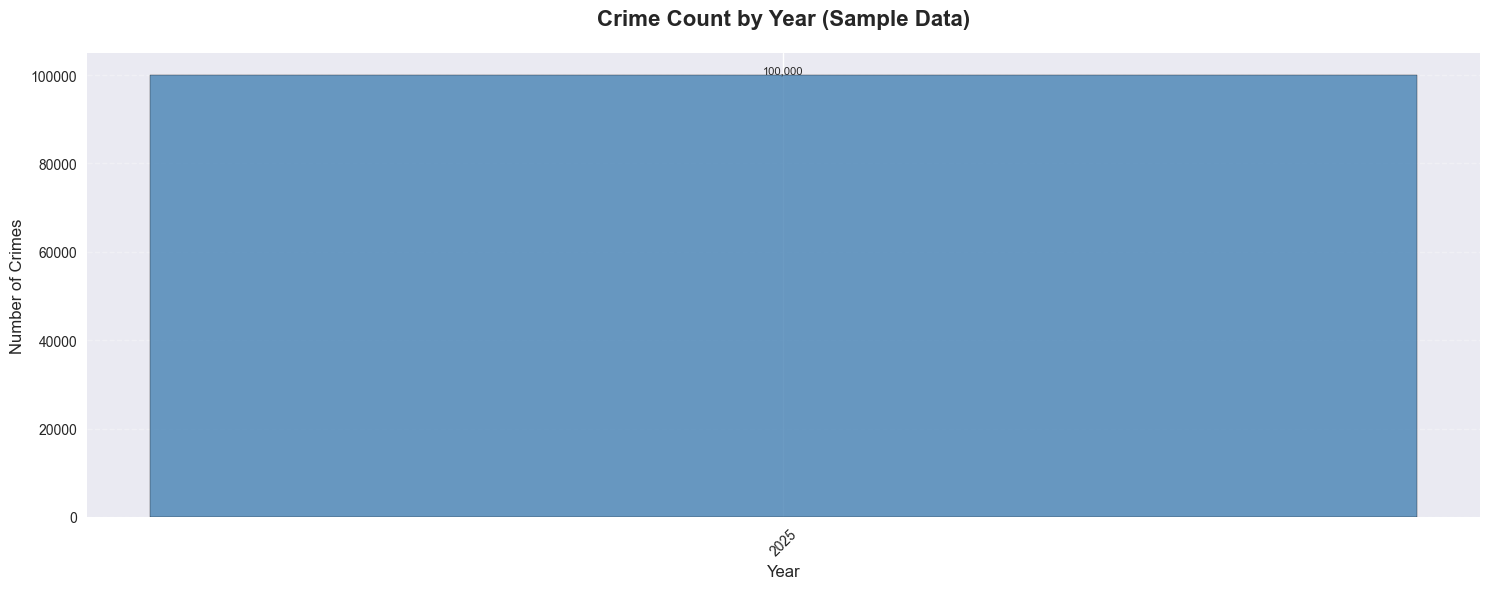


 Crimes by Year:
  2025: 100,000


In [37]:
# Visualize crimes by year
plt.figure(figsize=(15, 6))

year_counts = df['Year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values, color='steelblue', alpha=0.8, edgecolor='black')

plt.title('Crime Count by Year (Sample Data)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(year_counts.index, rotation=45)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for year, count in year_counts.items():
    plt.text(year, count, f'{count:,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\n Crimes by Year:")
for year, count in year_counts.items():
    print(f"  {year}: {count:,}")

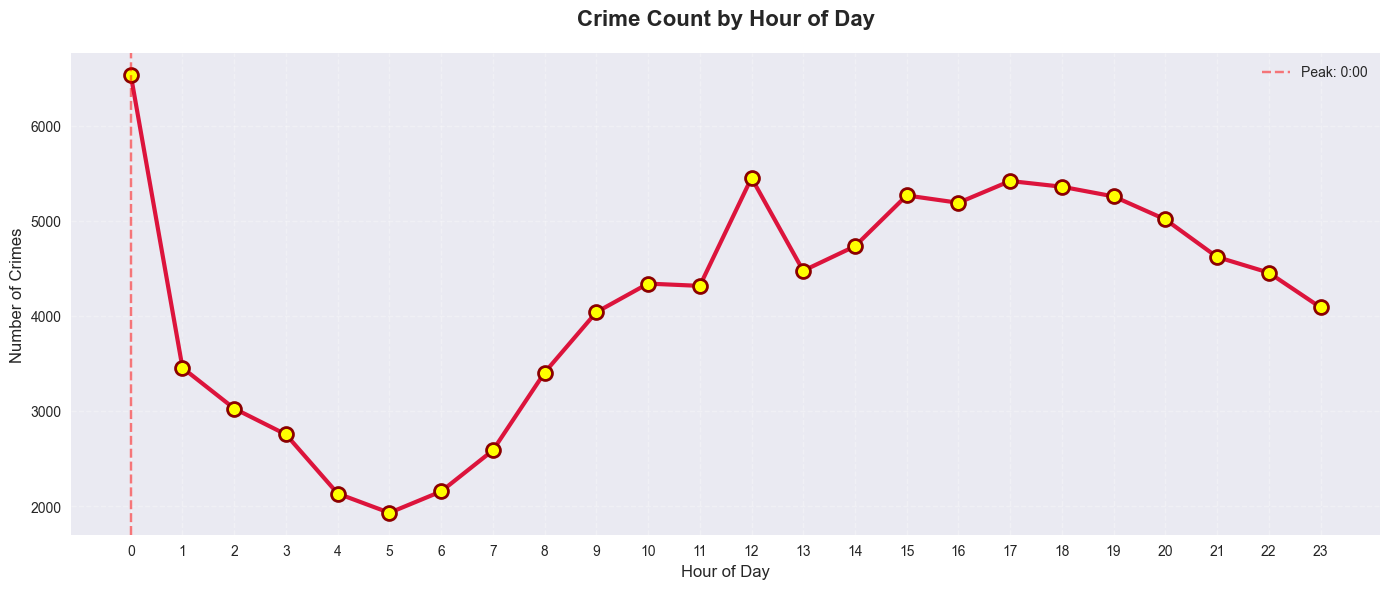


 HOURLY PATTERNS:
  Peak crime hour: 0:00 (6,536 crimes)
  Lowest crime hour: 5:00 (1,929 crimes)


In [38]:
# Crime patterns by hour
plt.figure(figsize=(14, 6))

hourly = df['Hour'].value_counts().sort_index()
plt.plot(hourly.index, hourly.values, marker='o', linewidth=3, 
         markersize=10, color='crimson', markerfacecolor='yellow', 
         markeredgecolor='darkred', markeredgewidth=2)

plt.title('Crime Count by Hour of Day', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3, linestyle='--')

# Highlight peak hours
peak_hour = hourly.idxmax()
plt.axvline(peak_hour, color='red', linestyle='--', alpha=0.5, label=f'Peak: {peak_hour}:00')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n HOURLY PATTERNS:")
print(f"  Peak crime hour: {hourly.idxmax()}:00 ({hourly.max():,} crimes)")
print(f"  Lowest crime hour: {hourly.idxmin()}:00 ({hourly.min():,} crimes)")

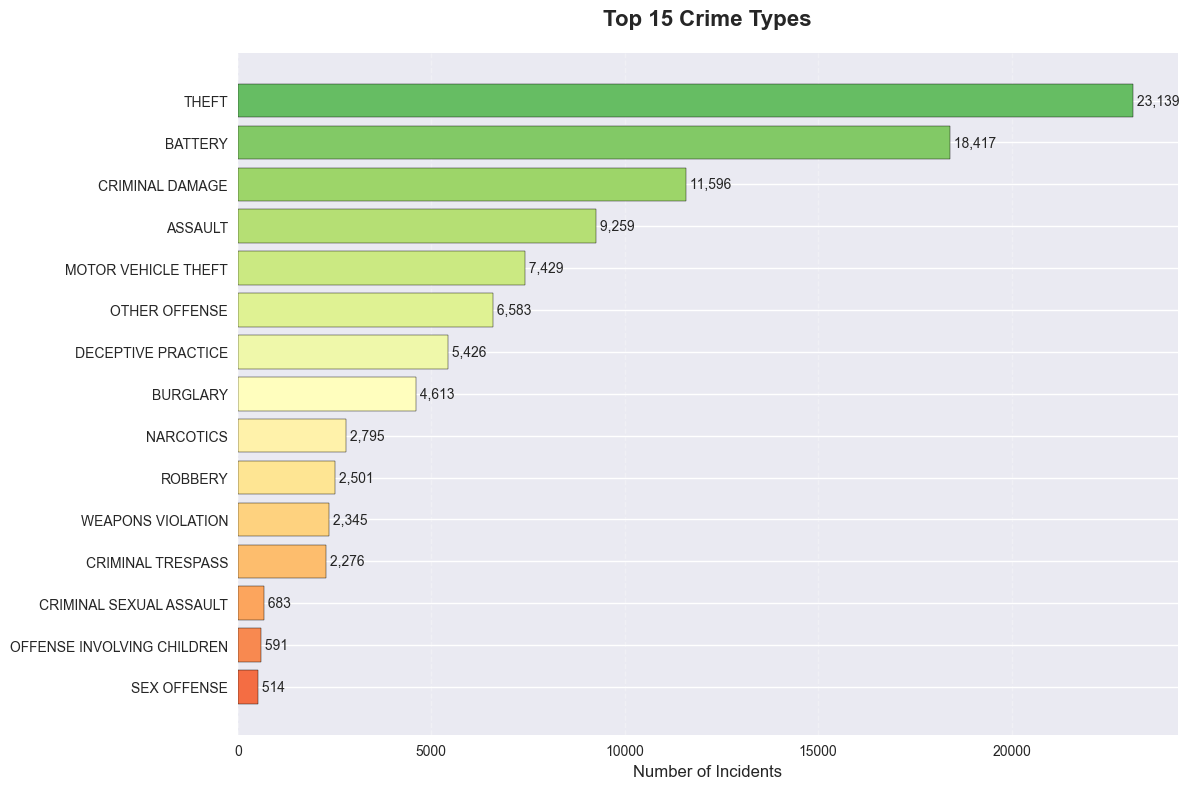


 Top 15 Crime Types:
 1. THEFT                         : 23,139 (23.14%)
 2. BATTERY                       : 18,417 (18.42%)
 3. CRIMINAL DAMAGE               : 11,596 (11.60%)
 4. ASSAULT                       :  9,259 ( 9.26%)
 5. MOTOR VEHICLE THEFT           :  7,429 ( 7.43%)
 6. OTHER OFFENSE                 :  6,583 ( 6.58%)
 7. DECEPTIVE PRACTICE            :  5,426 ( 5.43%)
 8. BURGLARY                      :  4,613 ( 4.61%)
 9. NARCOTICS                     :  2,795 ( 2.79%)
10. ROBBERY                       :  2,501 ( 2.50%)
11. WEAPONS VIOLATION             :  2,345 ( 2.34%)
12. CRIMINAL TRESPASS             :  2,276 ( 2.28%)
13. CRIMINAL SEXUAL ASSAULT       :    683 ( 0.68%)
14. OFFENSE INVOLVING CHILDREN    :    591 ( 0.59%)
15. SEX OFFENSE                   :    514 ( 0.51%)


In [39]:
# Top 15 crime types
top_crimes = df['Primary Type'].value_counts().head(15)

plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_crimes)))
bars = plt.barh(range(len(top_crimes)), top_crimes.values, color=colors, edgecolor='black')

plt.yticks(range(len(top_crimes)), top_crimes.index)
plt.xlabel('Number of Incidents', fontsize=12)
plt.title('Top 15 Crime Types', fontsize=16, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (crime, count) in enumerate(top_crimes.items()):
    plt.text(count, i, f' {count:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n Top 15 Crime Types:")
for i, (crime, count) in enumerate(top_crimes.items(), 1):
    pct = count / len(df) * 100
    print(f"{i:2d}. {crime:30s}: {count:6,} ({pct:5.2f}%)")

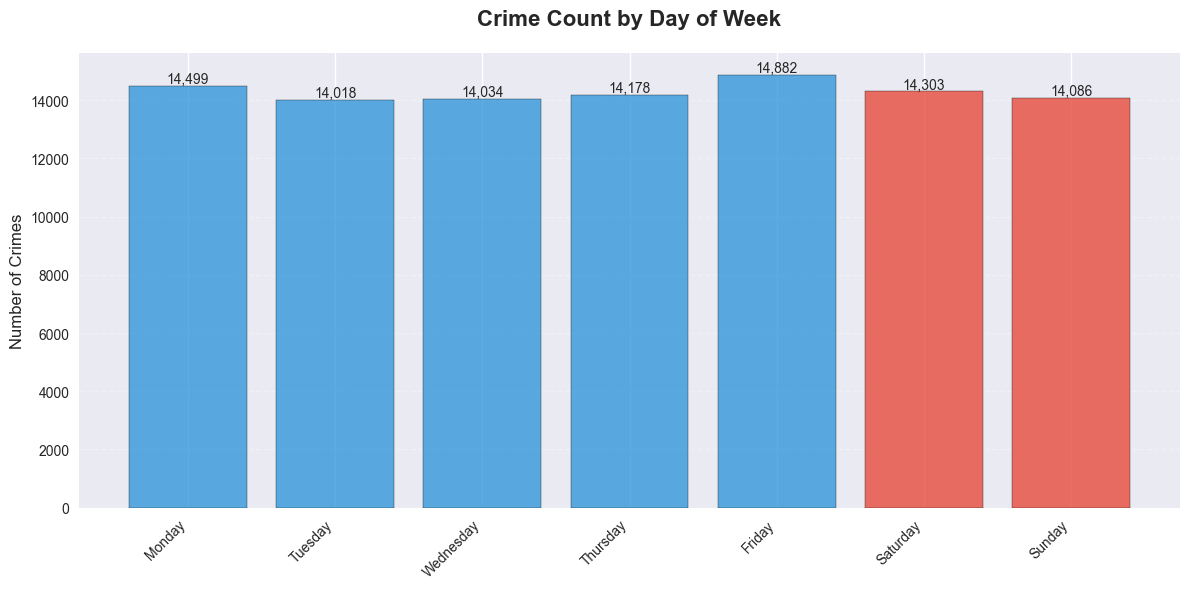


 Crime frequency by day:
  Monday    : 14,499 (14.50%)
  Tuesday   : 14,018 (14.02%)
  Wednesday : 14,034 (14.03%)
  Thursday  : 14,178 (14.18%)
  Friday    : 14,882 (14.88%)
  Saturday  : 14,303 (14.30%)
  Sunday    : 14,086 (14.09%)


In [40]:
# Crime by day of week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['DayOfWeek'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
colors = ['#3498db' if i < 5 else '#e74c3c' for i in range(7)]
bars = plt.bar(range(7), day_counts.values, color=colors, alpha=0.8, edgecolor='black')

plt.xticks(range(7), days, rotation=45, ha='right')
plt.title('Crime Count by Day of Week', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n Crime frequency by day:")
for i, day in enumerate(days):
    print(f"  {day:10s}: {day_counts[i]:,} ({day_counts[i]/len(df)*100:.2f}%)")

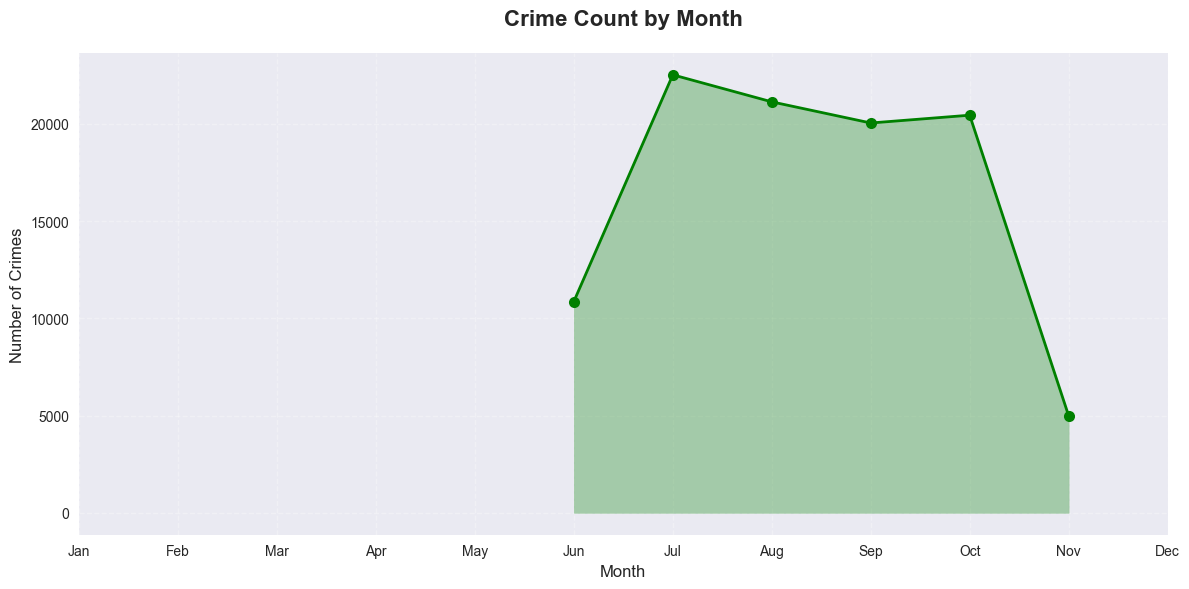


 Seasonal Patterns:
  Highest month: Jul (22,522 crimes)
  Lowest month: Nov (4,989 crimes)


In [41]:
# Crime by month
plt.figure(figsize=(12, 6))

monthly = df['Month'].value_counts().sort_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(monthly.index, monthly.values, marker='o', linewidth=2, 
         markersize=8, color='green')
plt.fill_between(monthly.index, monthly.values, alpha=0.3, color='green')

plt.xticks(range(1, 13), months)
plt.title('Crime Count by Month', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("\n Seasonal Patterns:")
print(f"  Highest month: {months[monthly.idxmax()-1]} ({monthly.max():,} crimes)")
print(f"  Lowest month: {months[monthly.idxmin()-1]} ({monthly.min():,} crimes)")

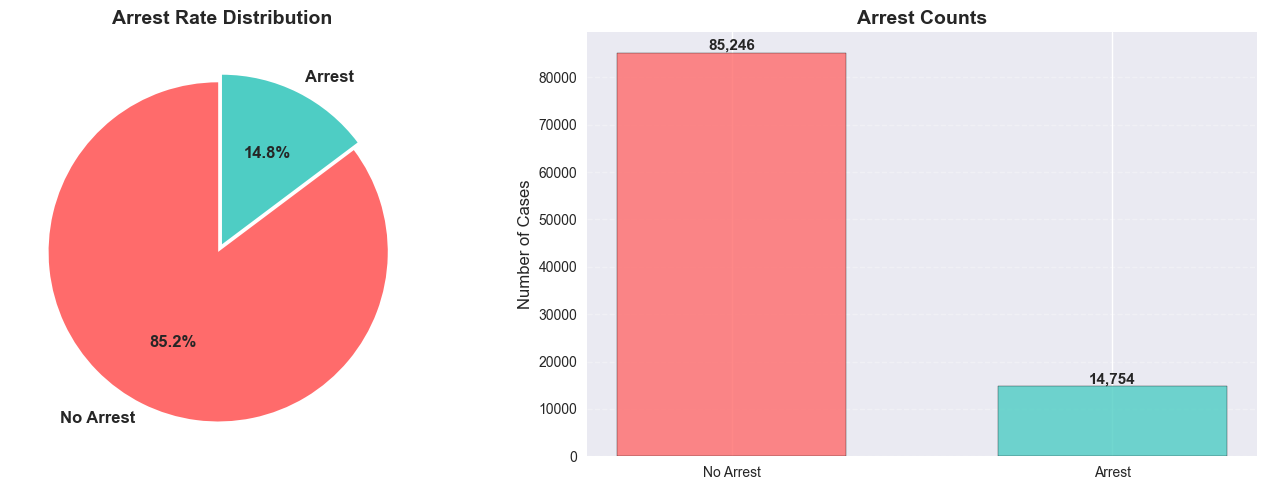


 ARREST STATISTICS:
  Overall Arrest Rate: 14.75%
  Arrests made: 14,754
  No arrests: 85,246


In [42]:
# Arrest rate analysis
if 'Arrest' in df.columns:
    arrest_counts = df['Arrest'].value_counts()
    arrest_rate = df['Arrest'].mean() * 100
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Pie chart
    colors_pie = ['#ff6b6b', '#4ecdc4']
    explode = (0.05, 0)
    ax1.pie(arrest_counts, labels=['No Arrest', 'Arrest'], 
            autopct='%1.1f%%', colors=colors_pie, explode=explode,
            startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
    ax1.set_title('Arrest Rate Distribution', fontsize=14, fontweight='bold')
    
    # Bar chart
    ax2.bar(['No Arrest', 'Arrest'], arrest_counts.values, 
            color=colors_pie, alpha=0.8, edgecolor='black', width=0.6)
    ax2.set_ylabel('Number of Cases', fontsize=12)
    ax2.set_title('Arrest Counts', fontsize=14, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels
    for i, v in enumerate(arrest_counts.values):
        ax2.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n ARREST STATISTICS:")
    print(f"  Overall Arrest Rate: {arrest_rate:.2f}%")
    print(f"  Arrests made: {arrest_counts[True]:,}")
    print(f"  No arrests: {arrest_counts[False]:,}")

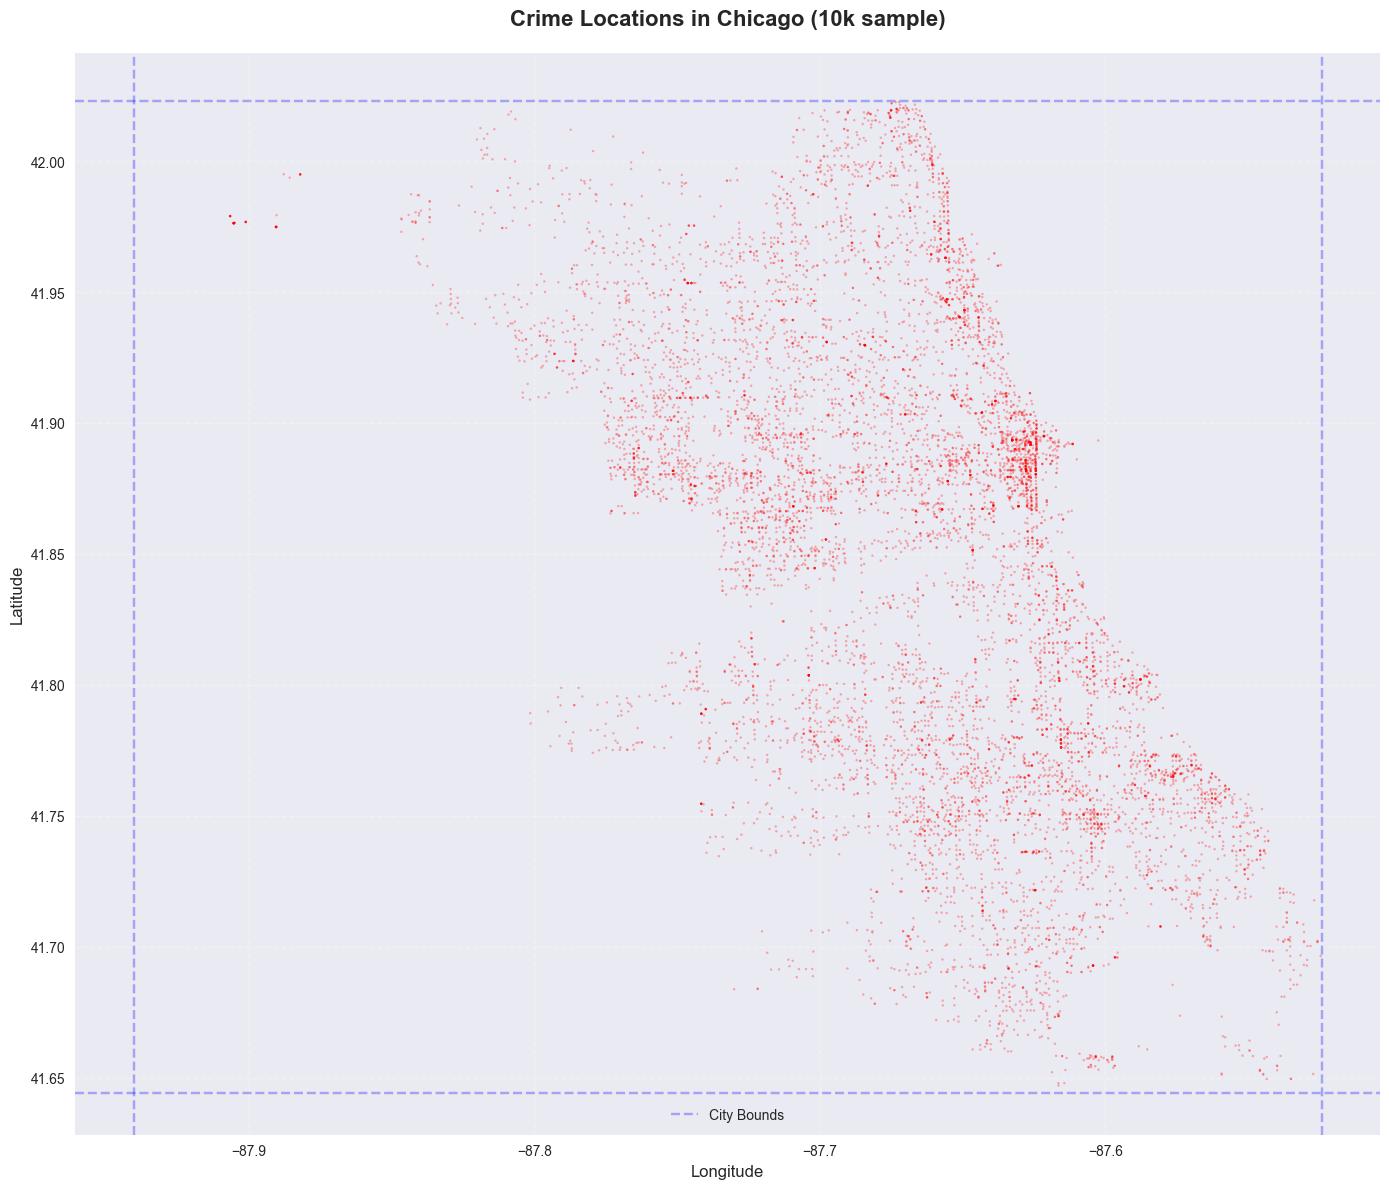


 SPATIAL COVERAGE:
  Valid coordinates: 99,951 (100.0%)
  Latitude range: 41.6453 to 42.0225
  Longitude range: -87.9289 to -87.5245


In [43]:
# Plot crime locations
valid_coords = df[['Latitude', 'Longitude']].dropna()
sample_coords = valid_coords.sample(min(10000, len(valid_coords)))

plt.figure(figsize=(14, 12))
plt.scatter(sample_coords['Longitude'], sample_coords['Latitude'], 
            alpha=0.3, s=3, c='red', edgecolors='none')

plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Crime Locations in Chicago (10k sample)', 
          fontsize=16, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')

# Add city boundary
plt.axhline(y=41.644, color='blue', linestyle='--', alpha=0.3, label='City Bounds')
plt.axhline(y=42.023, color='blue', linestyle='--', alpha=0.3)
plt.axvline(x=-87.940, color='blue', linestyle='--', alpha=0.3)
plt.axvline(x=-87.524, color='blue', linestyle='--', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n SPATIAL COVERAGE:")
print(f"  Valid coordinates: {len(valid_coords):,} ({len(valid_coords)/len(df)*100:.1f}%)")
print(f"  Latitude range: {valid_coords['Latitude'].min():.4f} to {valid_coords['Latitude'].max():.4f}")
print(f"  Longitude range: {valid_coords['Longitude'].min():.4f} to {valid_coords['Longitude'].max():.4f}")

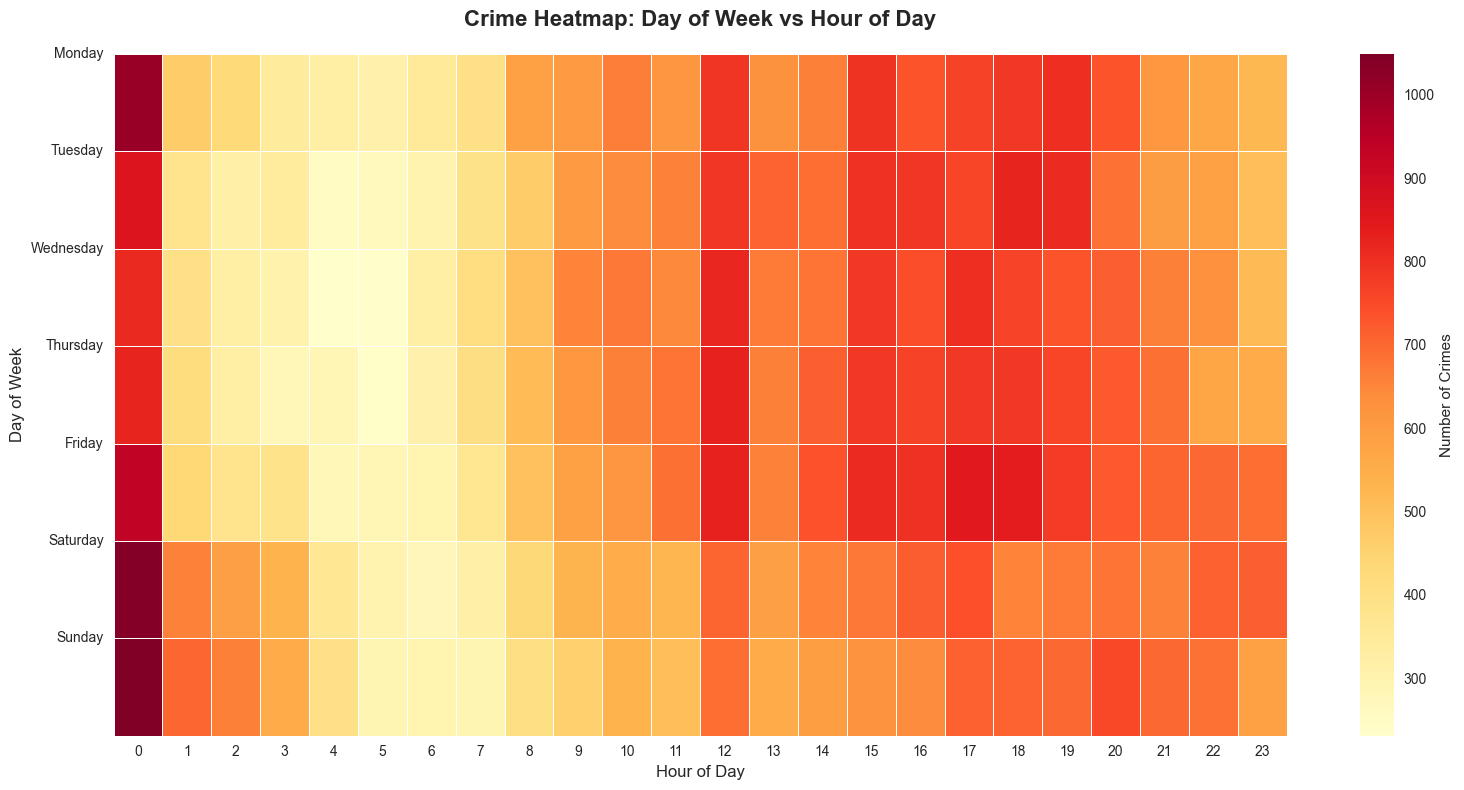


 HOTTEST TIME PERIODS:
  Peak: Sunday at 0:00 (1,049 crimes)


In [44]:
# Create heatmap of crimes by hour and day of week
pivot_table = df.groupby(['DayOfWeek', 'Hour']).size().reset_index(name='Count')
heatmap_data = pivot_table.pivot(index='DayOfWeek', columns='Hour', values='Count')

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt='d', 
            cbar_kws={'label': 'Number of Crimes'}, linewidths=0.5)

plt.yticks(range(7), days, rotation=0)
plt.title('Crime Heatmap: Day of Week vs Hour of Day', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.tight_layout()
plt.show()

print("\n HOTTEST TIME PERIODS:")
max_idx = heatmap_data.stack().idxmax()
print(f"  Peak: {days[max_idx[0]]} at {max_idx[1]}:00 ({heatmap_data.loc[max_idx[0], max_idx[1]]:,.0f} crimes)")

In [45]:
print("="*70)
print("WEEK 1 DATA EXPLORATION - FINAL SUMMARY")
print("Team: Kiran Ghumare, Neethu Satravada, Sajitha Mathi")
print("="*70)

print(f"\n DATASET OVERVIEW:")
print(f"  ✓ Records analyzed: {len(df):,}")
print(f"  ✓ Time period: {(df['Date'].max() - df['Date'].min()).days:,} days ({df['Year'].min()}-{df['Year'].max()})")
print(f"  ✓ Crime types: {df['Primary Type'].nunique()}")
print(f"  ✓ Unique locations: {df[['Latitude', 'Longitude']].drop_duplicates().shape[0]:,}")
print(f"  ✓ Data completeness: {(1 - df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100:.1f}%")

print("\n KEY FINDINGS:")
print(f"  • Most common crime: {df['Primary Type'].mode()[0]}")
print(f"  • Peak crime hour: {df['Hour'].mode()[0]}:00")
print(f"  • Peak crime day: {df['DayName'].mode()[0]}")
print(f"  • Arrest rate: {df['Arrest'].mean()*100:.2f}%")
print(f"  • Spatial coverage: {len(valid_coords)/len(df)*100:.1f}%")

print("\n TRENDS OBSERVED:")
print(f"  • Crimes peak during: {hourly.idxmax()}:00 hours")
print(f"  • Lowest crimes at: {hourly.idxmin()}:00 hours")
print(f"  • Weekend pattern: {'Higher' if day_counts[5:].mean() > day_counts[:5].mean() else 'Lower'} than weekdays")

print("\n" + "="*70)
print("✅ WEEK 1 DELIVERABLES COMPLETED")
print("="*70)
print("  ✓ Environment setup complete")
print("  ✓ Data downloaded (1.86 GB, ~100k records sample)")
print("  ✓ Data quality check completed")
print("  ✓ Exploratory analysis with 10+ visualizations")
print("  ✓ Key patterns identified")

print("\n" + "="*70)
print(" NEXT STEPS - WEEK 2")
print("="*70)
print("  1. Build ETL pipeline with PySpark")
print("  2. Process full dataset (not just sample)")
print("  3. Handle missing values systematically")
print("  4. Advanced feature engineering")
print("  5. Integrate weather and census data")
print("  6. Prepare data for modeling")

print("\n CONGRATULATIONS! Week 1 Complete!")
print("="*70)

WEEK 1 DATA EXPLORATION - FINAL SUMMARY
Team: Kiran Ghumare, Neethu Satravada, Sajitha Mathi

 DATASET OVERVIEW:
  ✓ Records analyzed: 100,000
  ✓ Time period: 146 days (2025-2025)
  ✓ Crime types: 30
  ✓ Unique locations: 59,855
  ✓ Data completeness: 100.0%

 KEY FINDINGS:
  • Most common crime: THEFT
  • Peak crime hour: 0:00
  • Peak crime day: Friday
  • Arrest rate: 14.75%
  • Spatial coverage: 100.0%

 TRENDS OBSERVED:
  • Crimes peak during: 0:00 hours
  • Lowest crimes at: 5:00 hours
  • Weekend pattern: Lower than weekdays

✅ WEEK 1 DELIVERABLES COMPLETED
  ✓ Environment setup complete
  ✓ Data downloaded (1.86 GB, ~100k records sample)
  ✓ Data quality check completed
  ✓ Exploratory analysis with 10+ visualizations
  ✓ Key patterns identified

 NEXT STEPS - WEEK 2
  1. Build ETL pipeline with PySpark
  2. Process full dataset (not just sample)
  3. Handle missing values systematically
  4. Advanced feature engineering
  5. Integrate weather and census data
  6. Prepare data

In [47]:
# !pip3 install pyspark pyarrow --break-system-packages
# %env JAVA_HOME=/opt/homebrew/opt/openjdk@17

from pyspark.sql import SparkSession

app_name = "Week2_ETL_ChicagoCrime"

spark = (
    SparkSession.builder
    .config("spark.ui.port", "4060")
    .appName(app_name)
    .getOrCreate()
)

spark